# Transcriptomics
The purpose of the notebook is to generate visualizations of the transcript yarrowia data from glucose, glycerol, and oleic acid conditions. 

First, the transcript measurements are converted to gsm reactions using gpr rules.

Next, the three conditions are compared using t-tests with data from the three trials. 

There are bar graphs and venn diagrams made to respresent the fraction of reactions that have statistically significant differences in transcript number.

Next, the transcripts of reactions mapped to 13C-MFA are visualized


### Load imports

In [1]:
import sys
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import cobra
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
plt.style.use('default')

source_dir = '../src'
sys.path.append(source_dir)

from get_gene_transcript_dictionary import get_gene_transcript_dictionary
from get_reaction_transcript_dictionary import get_reaction_transcript_dictionary


### Load the genome scale model

In [2]:
model = cobra.io.json.load_json_model('../genome_scale_models/iYLI647_corr_3.json')

### Rename some reactions to remove parentheses
This is because parentheses in reaction ids cause problems with StrainDesign

In [3]:
model.reactions.get_by_id('EX_glc(e)').id  = 'EX_glc_e'
model.reactions.get_by_id('EX_glyc(e)').id = 'EX_glyc_e'
model.reactions.get_by_id('EX_ocdcea(e)').id = 'EX_ocdcea_e'
model.reactions.get_by_id('EX_h2o(e)').id = 'EX_h2o_e'
model.reactions.get_by_id('EX_h(e)').id = 'EX_h_e'
model.reactions.get_by_id('EX_nh4(e)').id = 'EX_nh4_e'
model.reactions.get_by_id('EX_o2(e)').id = 'EX_o2_e'
model.reactions.get_by_id('EX_pi(e)').id = 'EX_pi_e'
model.reactions.get_by_id('EX_so4(e)').id = 'EX_so4_e'

# print an example reaction
model.reactions.get_by_id('EX_glc_e')

Reaction identifier,EX_glc_e
Name,D Glucose exchange
Memory address,0x1412a53c0
Stoichiometry,glc_D[e] <=> D_Glucose <=>
GPR,YALI0D01111g or YALI0D18876g or YALI0D00132g or YALI0B01342g or YALI0E23287g or YALI0B00396g or...
Lower bound,-10.0
Upper bound,1000.0


### Load transcriptomics data

In [4]:
transcriptomics_df = pd.read_csv("../data/transcriptomics/fpkm_counts.csv")
transcriptomics_df

,JGI_id,YALI0_id,glucose_1,glucose_2,glucose_3,glycerol_1,glycerol_2,glycerol_3,oleic_acid_1,oleic_acid_2,oleic_acid_3
0,jgi.p|Yarli1|64471,YALI0A00110g,4.88,2.64,3.23,1.21,1.11,3.61,6.77,13.32,7.67
1,jgi.p|Yarli1|64472,YALI0A00132g,1896.43,1845.77,1682.56,1234.99,1189.24,1120.35,864.64,1056.63,928.51
2,jgi.p|Yarli1|64473,YALI0A00154g,31.34,29.21,21.92,215.23,137.85,182.81,1867.59,2153.21,1958.68
3,jgi.p|Yarli1|64474,YALI0A00176g,3.67,3.85,3.15,3.07,1.74,2.09,4.13,2.43,4.34
4,jgi.p|Yarli1|64475,YALI0A00198g,0.00,0.17,0.00,0.00,0.50,1.29,1.55,0.81,1.75
...,...,...,...,...,...,...,...,...,...,...,...
6442,jgi.p|Yarli1|70913,YALI0F32043g,20.63,17.60,17.12,13.94,13.84,11.94,10.76,12.38,10.37
6443,jgi.p|Yarli1|70914,YALI0F32065g,192.58,151.54,270.76,206.89,262.66,280.82,310.55,384.22,313.24
6444,jgi.p|Yarli1|70915,YALI0F32131g,0.12,0.66,0.14,0.34,0.29,0.64,1.01,0.58,1.33
6445,jgi.p|Yarli1|70916,YALI0F32153g,26.16,27.73,28.77,39.22,36.95,39.18,26.98,22.05,23.58


### Make gene -> transcript dictionaries for each condition

In [5]:
glucose_1_gene_transcripts = get_gene_transcript_dictionary(transcriptomics_df, 'glucose_1')
glucose_2_gene_transcripts = get_gene_transcript_dictionary(transcriptomics_df, 'glucose_2')
glucose_3_gene_transcripts = get_gene_transcript_dictionary(transcriptomics_df, 'glucose_3')

glycerol_1_gene_transcripts = get_gene_transcript_dictionary(transcriptomics_df, 'glycerol_1')
glycerol_2_gene_transcripts = get_gene_transcript_dictionary(transcriptomics_df, 'glycerol_2')
glycerol_3_gene_transcripts = get_gene_transcript_dictionary(transcriptomics_df, 'glycerol_3')

oleic_acid_1_gene_transcripts = get_gene_transcript_dictionary(transcriptomics_df, 'oleic_acid_1')
oleic_acid_2_gene_transcripts = get_gene_transcript_dictionary(transcriptomics_df, 'oleic_acid_2')
oleic_acid_3_gene_transcripts = get_gene_transcript_dictionary(transcriptomics_df, 'oleic_acid_3')

glycerol_1_gene_transcripts


{'': inf,
 'YALI0A00110g': 1.21,
 'YALI0A00132g': 1234.99,
 'YALI0A00154g': 215.23,
 'YALI0A00176g': 3.07,
 'YALI0A00198g': 0.0,
 'YALI0A00212g': 6.31,
 'YALI0A00264g': 431.05,
 'YALI0A00286g': 168.19,
 'YALI0A00330g': 36.85,
 'YALI0A00352g': 1262.91,
 'YALI0A00369g': 2.47,
 'YALI0A00374g': 1.58,
 'YALI0A00396g': 83.79,
 'YALI0A00418g': 6.61,
 'YALI0A00440g': 203.47,
 'YALI0A00506g': 45.01,
 'YALI0A00528g': 0.28,
 'YALI0A00550g': 4.35,
 'YALI0A00572g': 0.87,
 'YALI0A00594g': 465.39,
 'YALI0A00616g': 31.17,
 'YALI0A00638g': 55.68,
 'YALI0A00660g': 44.31,
 'YALI0A00682g': 0.45,
 'YALI0A00759g': 37.36,
 'YALI0A00781g': 50.04,
 'YALI0A00803g': 129.99,
 'YALI0A00825g': 13.48,
 'YALI0A00847g': 47.26,
 'YALI0A00869g': 1.04,
 'YALI0A00891g': 170.39,
 'YALI0A00913g': 57.17,
 'YALI0A00935g': 0.47,
 'YALI0A00957g': 14.66,
 'YALI0A00979g': 21.97,
 'YALI0A01001g': 70.77,
 'YALI0A01023g': 94.11,
 'YALI0A01045g': 86.39,
 'YALI0A01067g': 213.91,
 'YALI0A01089g': 35.88,
 'YALI0A01111g': 50.01,
 'YALI0A

### Make reaction -> transcript dictionaries for each condition

In [6]:
glucose_1_reaction_transcripts = get_reaction_transcript_dictionary(model, glucose_1_gene_transcripts)
glucose_2_reaction_transcripts = get_reaction_transcript_dictionary(model, glucose_2_gene_transcripts)
glucose_3_reaction_transcripts = get_reaction_transcript_dictionary(model, glucose_3_gene_transcripts)

glycerol_1_reaction_transcripts = get_reaction_transcript_dictionary(model, glycerol_1_gene_transcripts)
glycerol_2_reaction_transcripts = get_reaction_transcript_dictionary(model, glycerol_2_gene_transcripts)
glycerol_3_reaction_transcripts = get_reaction_transcript_dictionary(model, glycerol_3_gene_transcripts)

oleic_acid_1_reaction_transcripts = get_reaction_transcript_dictionary(model, oleic_acid_1_gene_transcripts)
oleic_acid_2_reaction_transcripts = get_reaction_transcript_dictionary(model, oleic_acid_2_gene_transcripts)
oleic_acid_3_reaction_transcripts = get_reaction_transcript_dictionary(model, oleic_acid_3_gene_transcripts)

glycerol_1_reaction_transcripts

{'13BGH': 34.44,
 '13BGHe': 34.44,
 'ASADi': 370.66,
 '2DDA7Ptm': inf,
 '2DHPtm': inf,
 '2OHPH_5tn': inf,
 '2OMPH_5tm': inf,
 '2OMPH_5tn': inf,
 'ASPKi': 119.52,
 '34HPPOR': inf,
 '34HPPt2m': inf,
 '34HPPt2p': inf,
 '13GS': 0.39,
 '3C4MOPtm': inf,
 '3DSPHR': 107.06,
 '3HAO': 146.15,
 'GLCS2': 414.87,
 'SBTD_D2': 120.96,
 '3OPHB_5tm': inf,
 '4ABUTNtm': inf,
 '4ABUTtm': inf,
 '4ABZtm': inf,
 '4H2OGLTtm': inf,
 '4H2OGLTtp': inf,
 '4HBZtm': inf,
 '4HPRO_LTtm': inf,
 '4HTHRS': 185.27,
 '5AOPt2': 4.85,
 '5AOPtm': inf,
 '5MTHFtm': inf,
 '6PGLter': inf,
 '8AONNt2': inf,
 'AABTN': inf,
 'AASAD1': 172.08,
 'TRE6PP': 62.900000000000006,
 'ABTA': 88.19,
 'ABTt': inf,
 'ABUTDm': 0.4,
 'ABUTt2': 30.14,
 'TRE6PS': 23.91,
 'ACACT1m': 123.59,
 'ACACT4p': 581.47,
 'ACACT5p': 581.47,
 'ACACT6p': 581.47,
 'ACACT7p': 581.47,
 'ACACT8p': 581.47,
 'ACACT9p': 581.47,
 'PC': 535.91,
 'ACGAM6PS': 246.5,
 'ACGAMPM': 58.53,
 'ACGKm': 198.65,
 'ACGSm': 45.92,
 'ACOTAim': 212.89,
 'AGPRim': 198.65,
 'ACOAH': 488.85

### Make a dataframe from reaction dictionaries

In [7]:
from functools import reduce

# Make a dictionary of all the reaction transcript dictionaries
df_glucose_1 = pd.DataFrame.from_dict(glucose_1_reaction_transcripts, orient='index', columns=['glucose_1'])
df_glucose_2 = pd.DataFrame.from_dict(glucose_2_reaction_transcripts, orient='index', columns=['glucose_2'])
df_glucose_3 = pd.DataFrame.from_dict(glucose_3_reaction_transcripts, orient='index', columns=['glucose_3'])

df_glycerol_1 = pd.DataFrame.from_dict(glycerol_1_reaction_transcripts, orient='index', columns=['glycerol_1'])
df_glycerol_2 = pd.DataFrame.from_dict(glycerol_2_reaction_transcripts, orient='index', columns=['glycerol_2'])
df_glycerol_3 = pd.DataFrame.from_dict(glycerol_3_reaction_transcripts, orient='index', columns=['glycerol_3'])

df_oleic_acid_1 = pd.DataFrame.from_dict(oleic_acid_1_reaction_transcripts, orient='index', columns=['oleic_acid_1'])
df_oleic_acid_2 = pd.DataFrame.from_dict(oleic_acid_2_reaction_transcripts, orient='index', columns=['oleic_acid_2'])
df_oleic_acid_3 = pd.DataFrame.from_dict(oleic_acid_3_reaction_transcripts, orient='index', columns=['oleic_acid_3'])

dataframes = [df_glucose_1, df_glucose_2, df_glucose_3, df_glycerol_1, df_glycerol_2, df_glycerol_3, df_oleic_acid_1, df_oleic_acid_2, df_oleic_acid_3]

df_merged = pd.concat(dataframes, axis=1, sort=False)

df_merged


,glucose_1,glucose_2,glucose_3,glycerol_1,glycerol_2,glycerol_3,oleic_acid_1,oleic_acid_2,oleic_acid_3
13BGH,35.55,33.15,29.72,34.44,20.76,23.57,80.69,45.40,61.01
13BGHe,35.55,33.15,29.72,34.44,20.76,23.57,80.69,45.40,61.01
ASADi,336.06,355.76,332.26,370.66,380.73,353.02,197.16,193.19,188.87
2DDA7Ptm,inf,inf,inf,inf,inf,inf,inf,inf,inf
2DHPtm,inf,inf,inf,inf,inf,inf,inf,inf,inf
...,...,...,...,...,...,...,...,...,...
erythritolT,inf,inf,inf,inf,inf,inf,inf,inf,inf
EX_eryth(e),inf,inf,inf,inf,inf,inf,inf,inf,inf
EX_biom,inf,inf,inf,inf,inf,inf,inf,inf,inf
biomass_glucose,inf,inf,inf,inf,inf,inf,inf,inf,inf


### Add t-test signifance values to the average-standard deviation df

In [8]:
def perform_ttest(series1, series2):
    # Remove inf and NaN values for accurate t-test calculation
    clean_series1 = series1.replace([np.inf, -np.inf], np.nan).dropna()
    clean_series2 = series2.replace([np.inf, -np.inf], np.nan).dropna()

    # Perform t-test
    t_stat, p_value = ttest_ind(clean_series1, clean_series2, equal_var=False, nan_policy='omit')

    return p_value


df_merged['glucose_vs_glycerol'] = df_merged.apply(lambda row: perform_ttest(row[['glucose_1', 'glucose_2', 'glucose_3']], row[['glycerol_1', 'glycerol_2', 'glycerol_3']]), axis=1)
df_merged['glucose_vs_oleic_acid'] = df_merged.apply(lambda row: perform_ttest(row[['glucose_1', 'glucose_2', 'glucose_3']], row[['oleic_acid_1', 'oleic_acid_2', 'oleic_acid_3']]), axis=1)
df_merged['glycerol_vs_oleic_acid'] = df_merged.apply(lambda row: perform_ttest(row[['glycerol_1', 'glycerol_2', 'glycerol_3']], row[['oleic_acid_1', 'oleic_acid_2', 'oleic_acid_3']]), axis=1)

df_merged

,glucose_1,glucose_2,glucose_3,glycerol_1,glycerol_2,glycerol_3,oleic_acid_1,oleic_acid_2,oleic_acid_3,glucose_vs_glycerol,glucose_vs_oleic_acid,glycerol_vs_oleic_acid
13BGH,35.55,33.15,29.72,34.44,20.76,23.57,80.69,45.40,61.01,0.253299,0.097698,0.055670
13BGHe,35.55,33.15,29.72,34.44,20.76,23.57,80.69,45.40,61.01,0.253299,0.097698,0.055670
ASADi,336.06,355.76,332.26,370.66,380.73,353.02,197.16,193.19,188.87,0.070506,0.001018,0.001033
2DDA7Ptm,inf,inf,inf,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN
2DHPtm,inf,inf,inf,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
erythritolT,inf,inf,inf,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN
EX_eryth(e),inf,inf,inf,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN
EX_biom,inf,inf,inf,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN
biomass_glucose,inf,inf,inf,inf,inf,inf,inf,inf,inf,NaN,NaN,NaN


### Make average and std dev dataframe

In [9]:
# Make average and std dev for each carbon source dataframe 
avg_std_df = pd.DataFrame()

avg_std_df['glucose_vs_glycerol_p_value'] = df_merged['glucose_vs_glycerol']
avg_std_df['glucose_vs_oleic_acid_p_value'] = df_merged['glucose_vs_oleic_acid']
avg_std_df['glycerol_vs_oleic_acid_p_value'] = df_merged['glycerol_vs_oleic_acid']

avg_std_df['glucose_avg'] = df_merged[['glucose_1', 'glucose_2', 'glucose_3']].mean(axis=1)
avg_std_df['glucose_std'] = df_merged[['glucose_1', 'glucose_2', 'glucose_3']].std(axis=1)

avg_std_df['glycerol_avg'] = df_merged[['glycerol_1', 'glycerol_2', 'glycerol_3']].mean(axis=1)
avg_std_df['glycerol_std'] = df_merged[['glycerol_1', 'glycerol_2', 'glycerol_3']].std(axis=1)

avg_std_df['oleic_acid_avg'] = df_merged[['oleic_acid_1', 'oleic_acid_2', 'oleic_acid_3']].mean(axis=1)
avg_std_df['oleic_acid_std'] = df_merged[['oleic_acid_1', 'oleic_acid_2', 'oleic_acid_3']].std(axis=1)

# Replace 'inf' and '-inf' with 'NaN'
avg_std_df = avg_std_df.replace([np.inf, -np.inf], np.nan)

# Drop rows with any 'NaN' values
avg_std_df = avg_std_df.dropna()

avg_std_df


,glucose_vs_glycerol_p_value,glucose_vs_oleic_acid_p_value,glycerol_vs_oleic_acid_p_value,glucose_avg,glucose_std,glycerol_avg,glycerol_std,oleic_acid_avg,oleic_acid_std
13BGH,0.253299,0.097698,0.055670,32.806667,2.930125,26.256667,7.224904,62.366667,17.684073
13BGHe,0.253299,0.097698,0.055670,32.806667,2.930125,26.256667,7.224904,62.366667,17.684073
ASADi,0.070506,0.001018,0.001033,341.360000,12.614674,368.136667,14.026277,193.073333,4.146231
ASPKi,0.528249,0.002691,0.012282,110.906667,10.188902,104.176667,13.346851,56.823333,6.790481
13GS,0.115186,0.302373,0.473019,0.603333,0.187705,0.333333,0.081445,0.426667,0.177858
...,...,...,...,...,...,...,...,...,...
FACOAL40p,0.033963,0.007877,0.006112,985.406667,56.890233,1163.863333,75.221303,701.106667,18.767078
FAO40p,0.023330,0.003892,0.001591,880.103333,47.188940,2329.323333,401.232908,8066.433333,789.291340
LEUDH,0.041495,0.222900,0.095565,23.593333,10.407749,63.556667,18.133864,33.956667,5.334317
MBCOAi,0.165020,0.326925,0.215961,21.840000,3.351074,43.956667,18.123080,25.553333,4.597851


### Check number of significant differences

In [10]:
significance_level = 0.01

# Check number of significant differences
glu_vs_glyc_df = avg_std_df[avg_std_df['glucose_vs_glycerol_p_value'] < significance_level]
glu_vs_glyc_df = glu_vs_glyc_df.sort_values(by=['glucose_vs_glycerol_p_value'])

glu_vs_ole_df = avg_std_df[avg_std_df['glucose_vs_oleic_acid_p_value'] < significance_level]
glu_vs_ole_df = glu_vs_ole_df.sort_values(by=['glucose_vs_oleic_acid_p_value'])

glyc_vs_ole_df = avg_std_df[avg_std_df['glycerol_vs_oleic_acid_p_value'] < significance_level]
glyc_vs_ole_df = glyc_vs_ole_df.sort_values(by=['glycerol_vs_oleic_acid_p_value'])

print(f'There are {glu_vs_glyc_df.shape[0]} reactions that are significantly different between glucose and glycerol')
print(f'There are {glu_vs_ole_df.shape[0]} reactions that are significantly different between glucose and oleic acid')
print(f'There are {glyc_vs_ole_df.shape[0]} reactions that are significantly different between glycerol and oleic acid')

There are 241 reactions that are significantly different between glucose and glycerol
There are 358 reactions that are significantly different between glucose and oleic acid
There are 302 reactions that are significantly different between glycerol and oleic acid


### Define a function for a significant reactions bar graph 

In [11]:
def plot_significantly_expressed_bar_plot(significant_diff, not_significant_diff, percentages, not_significant_percentages, offset):
    plt.figure(figsize=(6, 6))
    categories = ['Glucose vs Glycerol', 'Glucose vs Oleic Acid', 'Glycerol vs Oleic Acid']

    # Plotting the bars for significantly different reactions
    bars = plt.bar(categories, significant_diff, color='skyblue', label='Significantly Different')

    # Stacking the complementary values
    plt.bar(categories, not_significant_diff, bottom=significant_diff, color='lightgrey', label='Not Significantly Different')

    plt.ylabel('Number of GSM Reactions', color='black')
    plt.title('Significantly Differentially Expressed GSM Reactions', color='black')
    plt.xticks(rotation=45, color='black')
    plt.yticks(color='black')
    plt.legend()

    # Adding text annotations for percentages
    for bar, percentage, not_significant_percentage in zip(bars, percentages, not_significant_percentages):
        yval = offset
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.0f}%', ha='center', va='bottom', color='black')
        yval = bar.get_height() + offset
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{not_significant_percentage:.0f}%', ha='center', va='bottom', color='black')

    plt.show()

### Make a bar graph to number of significantly expressed enzymes

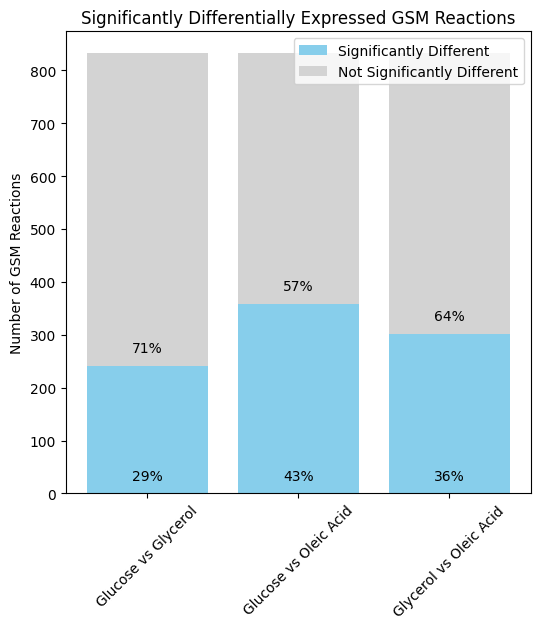

In [12]:
diff_glucose_glycerol = len(avg_std_df) - len(glu_vs_glyc_df)
diff_glucose_oleic_acid = len(avg_std_df) - len(glu_vs_ole_df)
diff_glycerol_oleic_acid = len(avg_std_df) - len(glyc_vs_ole_df)

categories = ['Glucose vs Glycerol', 'Glucose vs Oleic Acid', 'Glycerol vs Oleic Acid']
significant_diff = [len(glu_vs_glyc_df), len(glu_vs_ole_df), len(glyc_vs_ole_df)]
not_significant_diff = [diff_glucose_glycerol, diff_glucose_oleic_acid, diff_glycerol_oleic_acid]  # Complementary values
percentages = [x / len(avg_std_df)  * 100 for x in significant_diff]  # Calculate percentages
not_significant_percentages = [x / len(avg_std_df)  * 100 for x in not_significant_diff]  # Calculate percentages

plot_significantly_expressed_bar_plot(significant_diff, not_significant_diff, percentages, not_significant_percentages, 20)

### Make a 3 class ven diagram from the dataframes

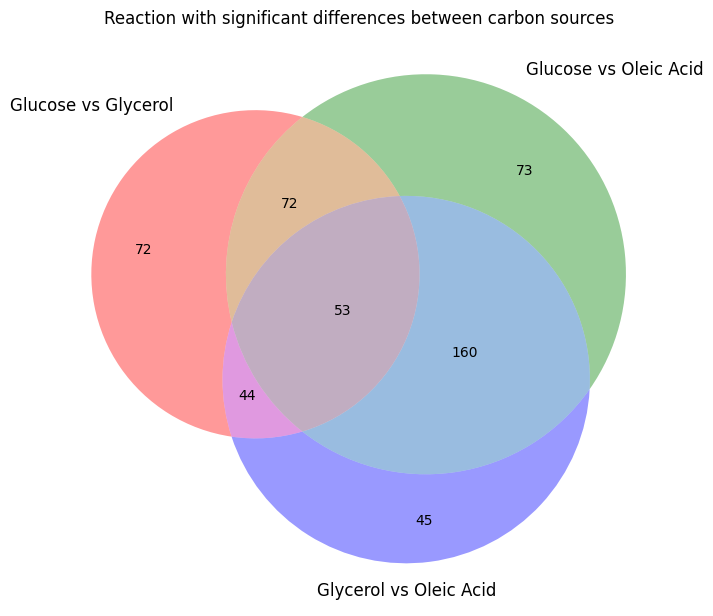

In [13]:
glu_vs_glyc_rxns = set(glu_vs_glyc_df.index)
glu_vs_ole_rxns = set(glu_vs_ole_df.index)
glyc_vs_ole_rxns = set(glyc_vs_ole_df.index)

plt.figure(figsize=(8, 8), facecolor='white', )  # Adjust the size of the figure as needed
v = venn3([glu_vs_glyc_rxns, glu_vs_ole_rxns, glyc_vs_ole_rxns], ('Glucose vs Glycerol', 'Glucose vs Oleic Acid', 'Glycerol vs Oleic Acid'))

plt.title("Reaction with significant differences between carbon sources")
plt.show()

### Load 13C-MFA and pFBA data

In [14]:
# load glucose 13C MFA data from ../data/13c_mfa/INCA_model_08302023_GR.xlsx
central_rxn_df = pd.read_excel('../data/13c_mfa/INCA_model_10232023_GR.xlsx', sheet_name='flux_data')

# calculate the number of reactions in the 13C MFA that are mapped to the GSM
mapped_rxn_df = central_rxn_df.dropna(subset = ["reaction_ids"])

print(f'There are {len(mapped_rxn_df)} reactions in the 13C MFA that are mapped to the GSM')

central_rxn_df.head()

There are 43 reactions in the 13C MFA that are mapped to the GSM


,Unnamed: 0,ID,Equation,reaction_ids,pathway,compartment,Location on map,glucose_flux,glucose_std_err,glucose_LB,...,glycerol_flux,glycerol_std_err,glycerol_LB,glycerol_UB,glycerol_ΔB,oleic_acid_flux,oleic_acid_std_err,oleic_acid_LB,oleic_acid_UB,oleic_acid_ΔB
0,uptake,uptake,Glucose + ATP -> G6P,reverse_EX_glc_e,substrate_uptake,cytosol,NaN,100.0000,5590.0000,100.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,uptake,R3 glyc3p,GLYC + ATP -> Glyc3P,reverse_GLYCt,emp,cytosol,NaN,NaN,NaN,NaN,...,100.0000,5.974500e-11,100.0000,100.0000,0.0000,NaN,NaN,NaN,NaN,NaN
2,uptake,R3 dhap net,Glyc3P <-> DHAP + UQH2,NaN,emp,cytosol,NaN,NaN,NaN,NaN,...,100.0000,5.974500e-11,100.0000,100.0000,0.0000,NaN,NaN,NaN,NaN,NaN
3,uptake,OA uptake,OA + ATP -> 9*ACCOAcyt + 7*NADH + 7*FADH2,OCDCEAt,substrate_uptake,cytosol,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100.000,2.594100e-10,100.000,100.000,0.000
4,glycolysis/gluconeogensis,R4 net,G6P <-> F6P,PGI,emp,cytosol,NaN,16.1585,903.3512,7.638,...,-19.1688,1.740200e+00,-26.9472,-15.8469,11.1003,-103.548,3.191300e+00,-345.183,-82.714,262.469


### Now just look at reactions that are mapped to the GSM

In [15]:
def get_gene_sets(gene_reaction_rule):
    # split the gpr by "and"
    and_split = gene_reaction_rule.split(" and ")

    reactions = []
    for gene_group in and_split:
        # remove parentheses if exist
        gene_group = gene_group.strip('()')

        # split the group by "or" if it's there
        or_split = gene_group.split(" or ")

        [reactions.append(reaction) for reaction in or_split]

    return reactions

gsm_reaction_id_column = central_rxn_df['reaction_ids'].to_list()

# filter out nan
gsm_reaction_id_column = [x for x in gsm_reaction_id_column if str(x) != 'nan']

central_gsm_rxns = []

for gsm_reaction_id_string in gsm_reaction_id_column:
    # print(gsm_reaction_id_string)
    # split by ' or ' and ' and '
    gsm_reaction_ids = get_gene_sets(gsm_reaction_id_string)

    gsm_reaction_ids = [x.replace('reverse_', '') for x in gsm_reaction_ids]

    [central_gsm_rxns.append(x) for x in gsm_reaction_ids]

# filter avg_std_df by central_gsm_rxns
central_avg_std_df = avg_std_df.copy()[avg_std_df.index.isin(central_gsm_rxns)]

central_avg_std_df

,glucose_vs_glycerol_p_value,glucose_vs_oleic_acid_p_value,glycerol_vs_oleic_acid_p_value,glucose_avg,glucose_std,glycerol_avg,glycerol_std,oleic_acid_avg,oleic_acid_std
PC,0.000841,0.001240,0.005400,231.186667,16.625018,559.196667,34.636501,346.946667,10.244961
ACOAH,0.001195,0.044127,0.002083,181.686667,10.180994,522.253333,30.961399,158.556667,4.066649
ACONTm,0.000818,0.807289,0.046354,959.220000,49.883233,595.933333,48.005294,934.870000,147.196369
AKGDam,0.537722,0.017236,0.014139,221.816667,23.842756,233.596667,18.431458,292.686667,15.715929
AKGDbm,0.537722,0.017236,0.014139,221.816667,23.842756,233.596667,18.431458,292.686667,15.715929
ALDD2y,0.098991,0.603499,0.084379,0.260000,0.115326,0.770000,0.323574,0.210000,0.101489
CSm,0.122116,0.000090,0.000029,954.396667,16.141172,1120.806667,112.706196,3714.223333,66.730632
ICDHxm,0.001722,0.000286,0.000288,379.973333,12.265905,304.773333,7.973847,548.706667,17.144650
ICDHym,0.022385,0.038452,0.006485,687.670000,27.744875,818.403333,47.355912,496.710000,77.461936
CITtbm,0.312519,0.009898,0.003074,208.670000,19.321804,225.176667,15.168106,115.256667,5.228856


### Check the number of significant differences

In [16]:
significance_level = 0.01

# Check number of significant differences
glu_vs_glyc_df = central_avg_std_df[central_avg_std_df['glucose_vs_glycerol_p_value'] < significance_level]
glu_vs_glyc_df = glu_vs_glyc_df.sort_values(by=['glucose_vs_glycerol_p_value'])

glu_vs_ole_df = central_avg_std_df[central_avg_std_df['glucose_vs_oleic_acid_p_value'] < significance_level]
glu_vs_ole_df = glu_vs_ole_df.sort_values(by=['glucose_vs_oleic_acid_p_value'])

glyc_vs_ole_df = central_avg_std_df[central_avg_std_df['glycerol_vs_oleic_acid_p_value'] < significance_level]
glyc_vs_ole_df = glyc_vs_ole_df.sort_values(by=['glycerol_vs_oleic_acid_p_value'])

print(f'There are {glu_vs_glyc_df.shape[0]} reactions that are significantly different between glucose and glycerol')
print(f'There are {glu_vs_ole_df.shape[0]} reactions that are significantly different between glucose and oleic acid')
print(f'There are {glyc_vs_ole_df.shape[0]} reactions that are significantly different between glycerol and oleic acid')

There are 15 reactions that are significantly different between glucose and glycerol
There are 20 reactions that are significantly different between glucose and oleic acid
There are 18 reactions that are significantly different between glycerol and oleic acid


### Make a bar graph to number of significantly expressed enzymes

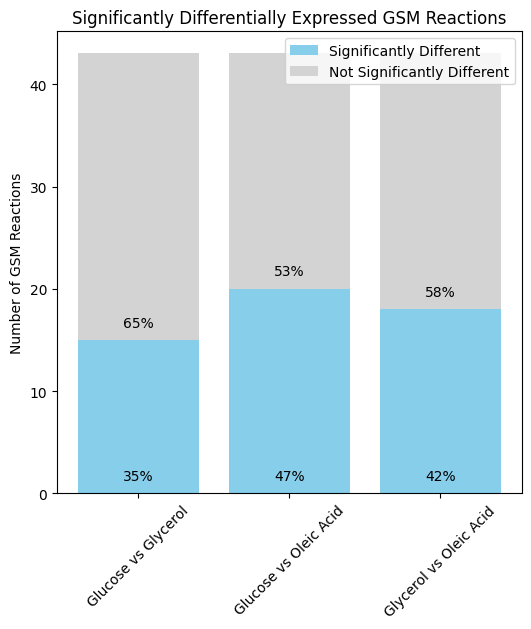

In [17]:
diff_glucose_glycerol = len(central_avg_std_df) - len(glu_vs_glyc_df)
diff_glucose_oleic_acid = len(central_avg_std_df) - len(glu_vs_ole_df)
diff_glycerol_oleic_acid = len(central_avg_std_df) - len(glyc_vs_ole_df)

categories = ['Glucose vs Glycerol', 'Glucose vs Oleic Acid', 'Glycerol vs Oleic Acid']
significant_diff = [len(glu_vs_glyc_df), len(glu_vs_ole_df), len(glyc_vs_ole_df)]
not_significant_diff = [diff_glucose_glycerol, diff_glucose_oleic_acid, diff_glycerol_oleic_acid]  # Complementary values
percentages = [x / len(central_avg_std_df)  * 100 for x in significant_diff]  # Calculate percentages
not_significant_percentages = [x / len(central_avg_std_df)  * 100 for x in not_significant_diff]  # Calculate percentages

plot_significantly_expressed_bar_plot(significant_diff, not_significant_diff, percentages, not_significant_percentages, 1)

### Add details to central transcript df for plotting

In [18]:
# define a function to get the MFA reaction for a given GSM reaction id
def get_mfa_reaction_from_gsm_id(df, gsm_reaction_id):
    # Get the row with the gsm_reaction_id, handling NaN values
    row = df[df['reaction_ids'].str.contains(gsm_reaction_id, na=False)]

    # Check if the row is empty
    if row.empty:
        return "No matching MFA reaction found"
    
    # Get the mfa_reaction_id
    mfa_reaction_id = row['Equation'].values[0]
    
    return mfa_reaction_id

# define a function to get the MFA reaction for a given GSM reaction id
def get_mfa_pathway_from_gsm_id(df, gsm_reaction_id):
    # Get the row with the gsm_reaction_id, handling NaN values
    row = df[df['reaction_ids'].str.contains(gsm_reaction_id, na=False)]

    # Check if the row is empty
    if row.empty:
        return "No matching MFA reaction found"
    
    # Get the mfa_reaction_id
    mfa_reaction_id = row['pathway'].values[0]
    
    return mfa_reaction_id

names = []
gsm_reactions = []
gsm_gprs = []
mfa_reactions = []
mfa_pathways = []

for reaction_id, row in central_avg_std_df.iterrows():
    reaction = model.reactions.get_by_id(reaction_id)
    name = reaction.name
    reaction_string = reaction.reaction
    gpr = reaction.gene_reaction_rule
    mfa_reaction = get_mfa_reaction_from_gsm_id(central_rxn_df, reaction_id)
    pathway = get_mfa_pathway_from_gsm_id(central_rxn_df, reaction_id)

    names.append(name)  
    gsm_reactions.append(reaction_string)
    gsm_gprs.append(gpr)
    mfa_reactions.append(mfa_reaction)
    mfa_pathways.append(pathway)

central_avg_std_df['reaction_name'] = names
central_avg_std_df['gsm_reaction_string'] = gsm_reactions
central_avg_std_df['mfa_reaction_string'] = mfa_reactions
central_avg_std_df['gpr'] = gsm_gprs
central_avg_std_df['mfa_pathway'] = mfa_pathways

central_avg_std_df

,glucose_vs_glycerol_p_value,glucose_vs_oleic_acid_p_value,glycerol_vs_oleic_acid_p_value,glucose_avg,glucose_std,glycerol_avg,glycerol_std,oleic_acid_avg,oleic_acid_std,reaction_name,gsm_reaction_string,mfa_reaction_string,gpr,mfa_pathway
PC,0.000841,0.001240,0.005400,231.186667,16.625018,559.196667,34.636501,346.946667,10.244961,pyruvate carboxylase,atp[c] + hco3[c] + pyr[c] --> adp[c] + h[c] + ...,OAAcyt + ATP -> PEP + CO2,YALI0C24101g,anaplerotic
ACOAH,0.001195,0.044127,0.002083,181.686667,10.180994,522.253333,30.961399,158.556667,4.066649,acetyl CoA hydrolase,accoa[c] + h2o[c] --> ac[c] + coa[c] + h[c],AC + ATP <-> ACCOAcyt,YALI0E30965g,acetate_metabolism
ACONTm,0.000818,0.807289,0.046354,959.220000,49.883233,595.933333,48.005294,934.870000,147.196369,Aconitate hydratase,cit[m] <=> icit[m],CITmit <-> ICTmit,YALI0D09361g or YALI0E14949g,tca_cycle
AKGDam,0.537722,0.017236,0.014139,221.816667,23.842756,233.596667,18.431458,292.686667,15.715929,oxoglutarate dehydrogenase lipoamide,akg[m] + h[m] + lpam[m] <=> co2[m] + sdhlam[m],AKG -> 0.5*SUCmit + 0.5*SUCmit + CO2 + ATP + NADH,YALI0E33517g and YALI0E16929g,tca_cycle
AKGDbm,0.537722,0.017236,0.014139,221.816667,23.842756,233.596667,18.431458,292.686667,15.715929,oxoglutarate dehydrogenase dihydrolipoamide S ...,coa[m] + sdhlam[m] --> dhlam[m] + succoa[m],AKG -> 0.5*SUCmit + 0.5*SUCmit + CO2 + ATP + NADH,YALI0E33517g and YALI0E16929g and YALI0D20768g,tca_cycle
ALDD2y,0.098991,0.603499,0.084379,0.260000,0.115326,0.770000,0.323574,0.210000,0.101489,aldehyde dehydrogenase acetaldehyde NADP,acald[c] + h2o[c] + nad[c] --> ac[c] + 2.0 h[c...,AA -> AC + NADH,YALI0C03025g,acetate_metabolism
CSm,0.122116,0.000090,0.000029,954.396667,16.141172,1120.806667,112.706196,3714.223333,66.730632,citrate synthase,accoa[m] + h2o[m] + oaa[m] --> cit[m] + coa[m]...,ACCOAmit + OAAmit -> CITmit,YALI0E00638g or YALI0E02684g,tca_cycle
ICDHxm,0.001722,0.000286,0.000288,379.973333,12.265905,304.773333,7.973847,548.706667,17.144650,Isocitrate dehydrogenase NAD,icit[m] + nad[m] --> akg[m] + co2[m] + nadh[m],ICTmit -> AKG + CO2 + NADH,YALI0E05137g and YALI0D06303g,tca_cycle
ICDHym,0.022385,0.038452,0.006485,687.670000,27.744875,818.403333,47.355912,496.710000,77.461936,Isocitrate dehydrogenase NADP,icit[m] + nadp[m] --> akg[m] + co2[m] + nadph[m],ICTmit -> AKG + CO2 + NADPH,YALI0F04095g,tca_cycle
CITtbm,0.312519,0.009898,0.003074,208.670000,19.321804,225.176667,15.168106,115.256667,5.228856,citrate transport mitochondrial,cit[c] + pep[m] <=> cit[m] + pep[c],CITmit -> CITcyt,YALI0F26323g,transport


### Define a function for plotting a single reaction's transcript data

In [21]:
# Function to draw significance brackets
def draw_bracket(ax, bar1, bar2, max_height, offset, height_scale=1.02):
    # y_max = max(bar1.get_height(), bar2.get_height()) + offset
    y_max = max_height * offset
    bar1_center = bar1.get_x() + bar1.get_width() / 2
    bar2_center = bar2.get_x() + bar2.get_width() / 2

    ax.plot([bar1_center, bar1_center, bar2_center, bar2_center], [y_max, y_max * height_scale, y_max * height_scale, y_max], lw=1, c='black')
    ax.text((bar1_center + bar2_center) / 2, y_max * height_scale, '*', ha='center', va='bottom')

def plot_transcript_values(row, ax):
    # Extract data
    averages = [row['glucose_avg'], row['glycerol_avg'], row['oleic_acid_avg']]
    std_devs = [row['glucose_std'], row['glycerol_std'], row['oleic_acid_std']]
    p_values = [row['glucose_vs_glycerol_p_value'], row['glucose_vs_oleic_acid_p_value'], row['glycerol_vs_oleic_acid_p_value']]
    labels = ['Glucose', 'Glycerol', 'Oleic Acid']

    max_height = max([average + std_dev for average, std_dev in zip(averages, std_devs)])

    # Setting up the plot
    bars = ax.bar(labels, averages, yerr=std_devs, capsize=5)

    # Adding significance brackets
    if p_values[0] < 0.01:  # Glucose vs Glycerol
        draw_bracket(ax, bars[0], bars[1], max_height, 1.125)
    if p_values[1] < 0.01:  # Glucose vs Oleic Acid
        draw_bracket(ax, bars[0], bars[2], max_height, 1.2)
    if p_values[2] < 0.01:  # Glycerol vs Oleic Acid
        draw_bracket(ax, bars[1], bars[2], max_height, 1.05)

    # Adding title and labels
    font_size = 8
    title_text= f"{row['reaction_name']}\n{row['mfa_reaction_string']}\n{row['gsm_reaction_string']}"
    ax.tick_params(axis='both', which='major', labelsize=font_size)
    ax.set_title(title_text, fontsize=font_size)
    ax.set_ylabel('Average FPKM Counts', fontsize=font_size)

### Define a function to make a grid of plots of central pathway transcript values

In [44]:
def plot_reaction_grid(central_avg_std_df, pathway_name=None):
    # Determine the size of the grid
    num_rows = len(central_avg_std_df)
    ncols = 4  # or however many columns you want
    nrows = (num_rows + ncols - 1) // ncols  # ensures enough rows to accommodate all plots

    # Create subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 3.5, nrows * 3))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration

    # Iterate through the DataFrame and create plots
    for i, (idx, row) in enumerate(central_avg_std_df.iterrows()):
        ax = axes[i]
        plot_transcript_values(row, ax)  # Modify your function to accept 'ax' as an argument

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    # add suptitle
    fig.suptitle(f"{pathway_name} reactions", fontsize=12, x=.1)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

### Make plots for each pathway

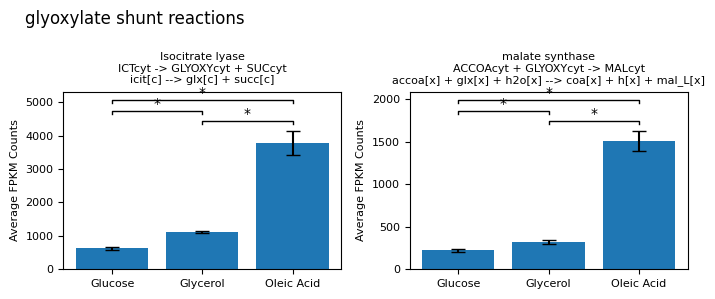

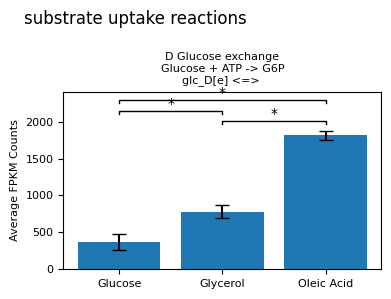

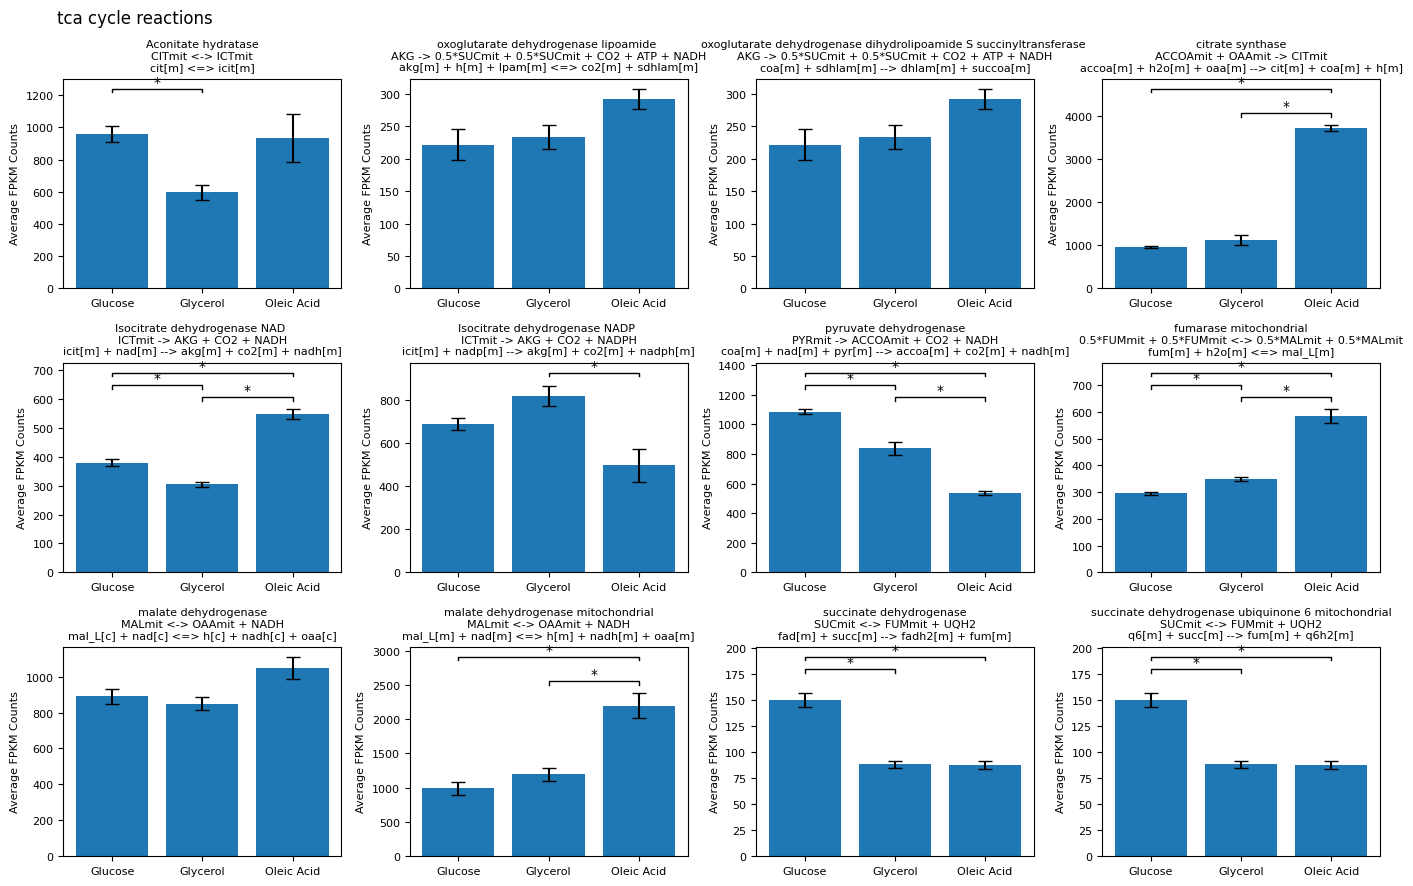

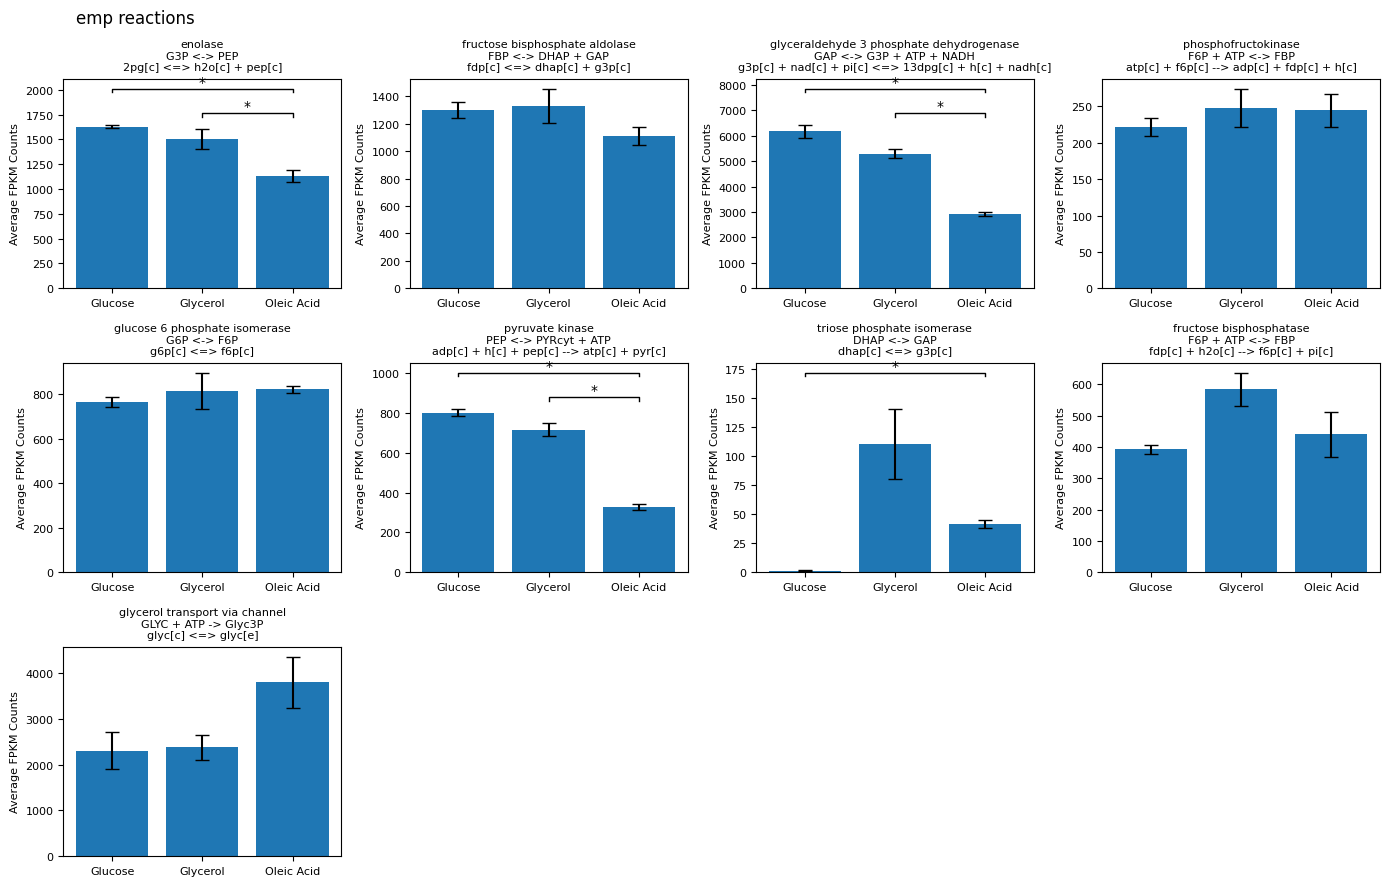

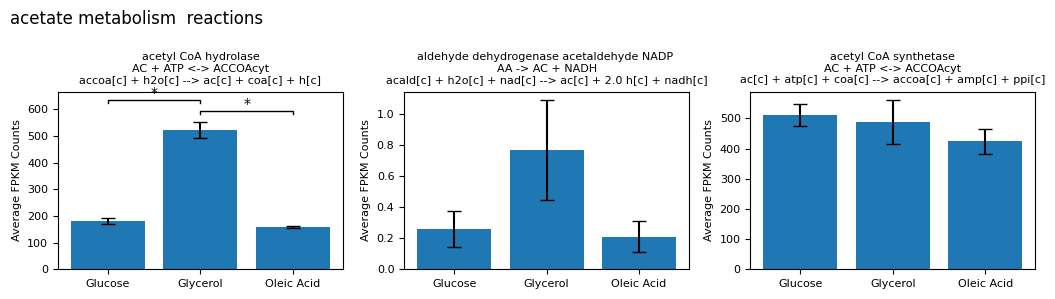

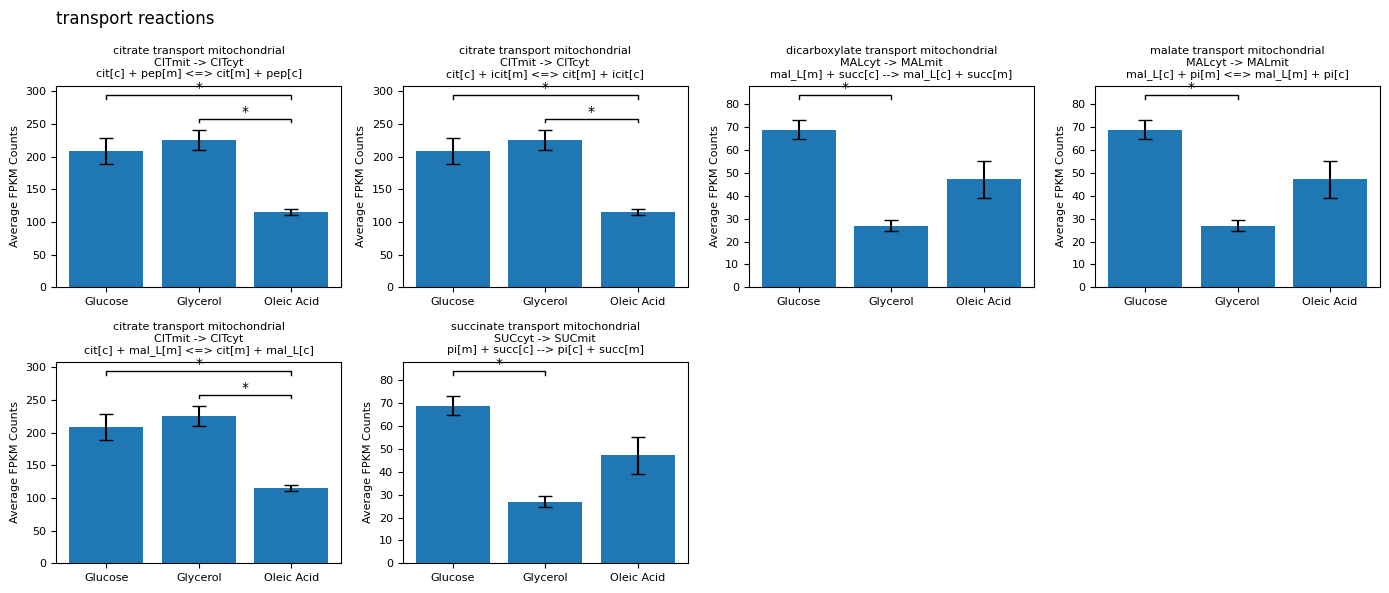

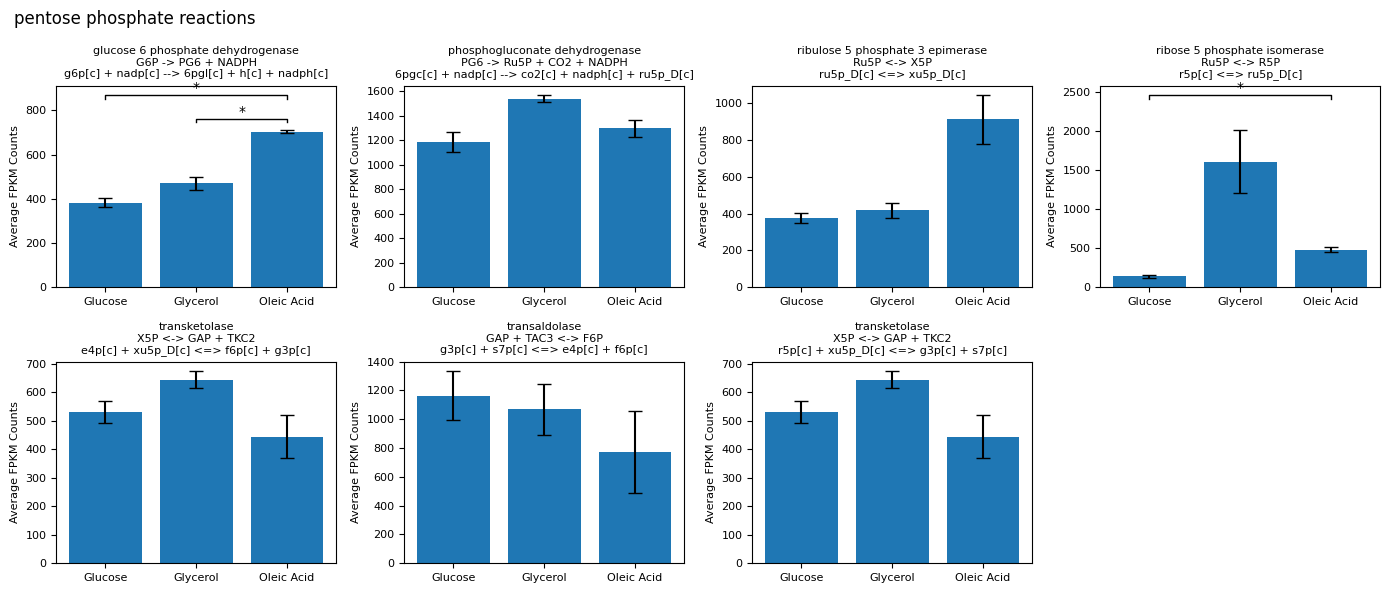

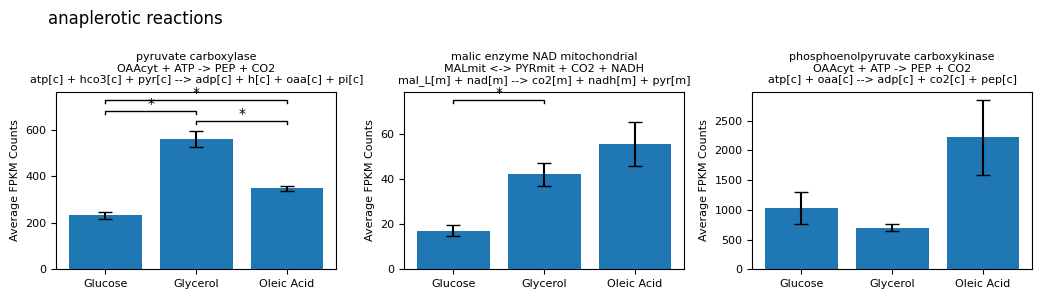

In [45]:
for pathway in set(central_avg_std_df['mfa_pathway']):
    pathway_avg_std_df = central_avg_std_df[central_avg_std_df['mfa_pathway'] == pathway]
    plot_reaction_grid(pathway_avg_std_df, pathway.replace('_', ' '))

In [46]:
set(central_avg_std_df['mfa_pathway'])

{'acetate_metabolism ',
 'anaplerotic',
 'emp',
 'glyoxylate_shunt',
 'pentose_phosphate',
 'substrate_uptake',
 'tca_cycle',
 'transport'}